In [3]:
# 1. Imports
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [4]:
import sys
import os

script_dir = os.path.abspath("../scripts")
if script_dir not in sys.path:
    sys.path.append(script_dir)


In [5]:
# 2. Load presence-only data
presence_path = "../data/processed/quercus_engelmannii_with_elevation_climate_soil_landcover.geojson"
gdf = gpd.read_file(presence_path)

print(f"Shape: {gdf.shape}")
gdf.head()

Shape: (1183, 67)


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,mukey,compname,drainagecl,majcompflag,musym,muname,areasymbol,land_cover,land_cover_class,geometry
0,891746802,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/416308,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,456781,Rock outcrop,None,Yes,CnE2,"Cieneba-Fallbrook rocky sandy loams, 9 to 30 p...",CA638,52,Shrub/Scrub,POINT (-1925159.98728 1297636.9861)
1,3773764646,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/11604...,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,456753,Bosanko,Well drained,Yes,BtC,"Bosanko stony clay, 5 to 9 percent slopes",CA638,52,Shrub/Scrub,POINT (-1917327.6991 1293890.7059)
2,3773801388,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/11603...,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,456820,Friant,Well drained,Yes,FxE,"Friant rocky fine sandy loam, 9 to 30 percent ...",CA638,52,Shrub/Scrub,POINT (-1935960.70468 1340878.48889)
3,3784994150,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/11724...,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,3295912,Holland,Well drained,Yes,HnE,"Holland stony fine sandy loam, 5 to 30 percent...",CA638,52,Shrub/Scrub,POINT (-1899223.60942 1323802.96265)
4,3858199707,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/87934818,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,3295921,Rock outcrop,None,Yes,CmrG,"Cieneba-Rock outcrop complex, 30 to 75 percent...",CA638,52,Shrub/Scrub,POINT (-1925566.73796 1305944.36485)


In [6]:
# 3. Summary statistics of numeric features
gdf[["elevation", "precip_mm", "temp_c"]].describe()

,elevation,precip_mm,temp_c
count,1183.000000,1183.000000,1183.000000
mean,626.511970,446.214227,16.454406
std,348.384907,81.636002,1.036615
min,2.099350,271.022980,11.700000
25%,398.590700,387.748990,15.690000
50%,573.257450,421.515990,16.600000
75%,934.853120,515.010990,17.100000
max,1818.880000,727.750000,18.750000


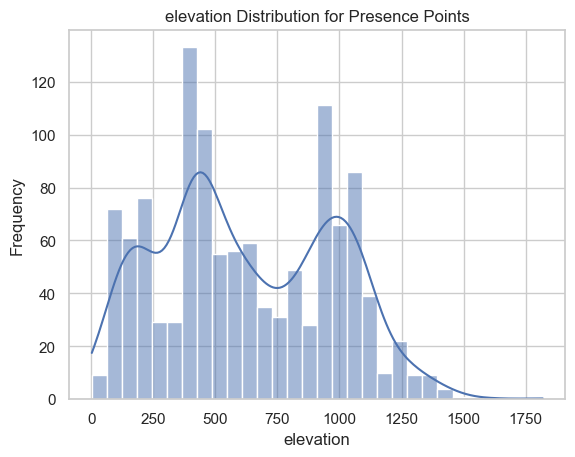

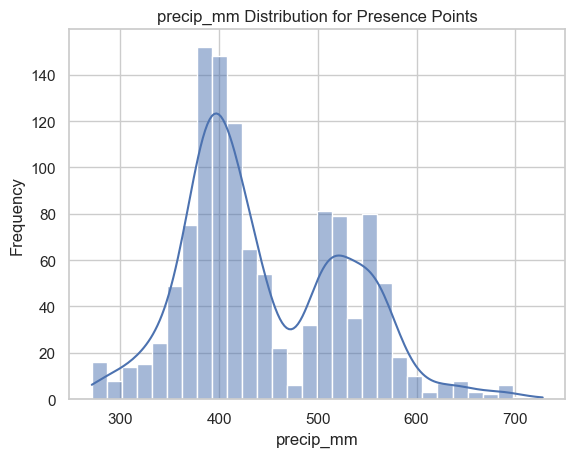

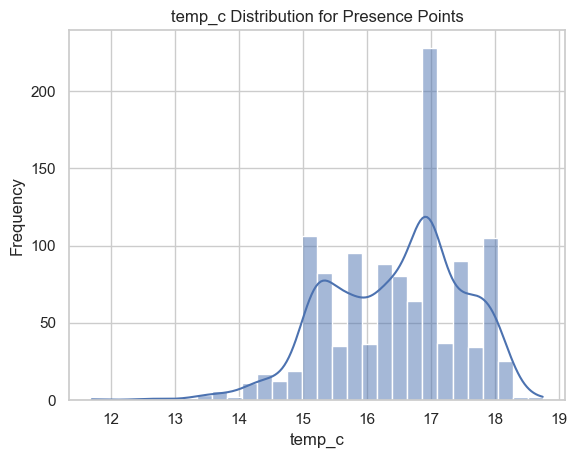

In [7]:
# 4. Histograms for environmental variables
for col in ["elevation", "precip_mm", "temp_c"]:
    plt.figure()
    sns.histplot(gdf[col], bins=30, kde=True)
    plt.title(f"{col} Distribution for Presence Points")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [8]:
# 5. Most common land cover and soil types
print("Top land cover classes:")
print(gdf["land_cover_class"].value_counts())

print("\nTop soil components:")
print(gdf["compname"].value_counts().head())

Top land cover classes:
land_cover_class
Shrub/Scrub                     853
Developed, Open Space           130
Developed, Low Intensity         60
Grassland/Herbaceous             45
Mixed Forest                     35
Woody Wetlands                   28
Developed, Medium Intensity      14
Evergreen Forest                 12
Emergent Herbaceous Wetlands      5
Deciduous Forest                  1
Name: count, dtype: int64

Top soil components:
compname
Holland         150
Cieneba         135
Rock outcrop     97
Fallbrook        95
Visalia          86
Name: count, dtype: int64


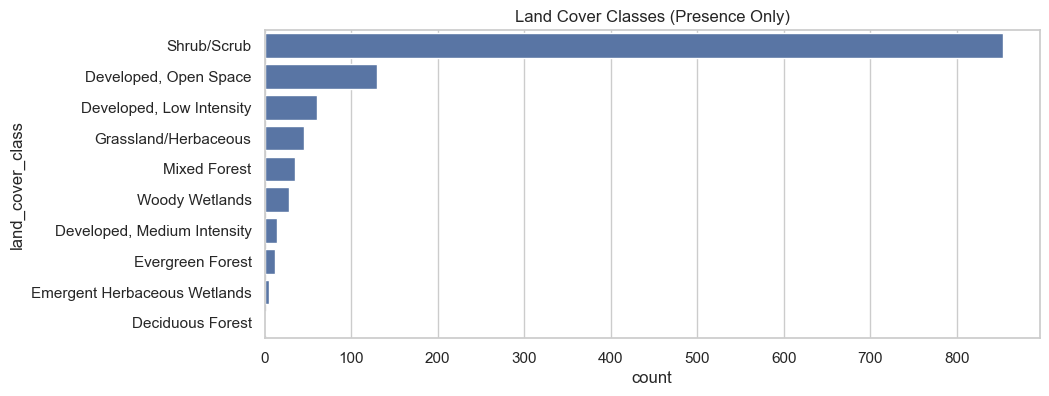

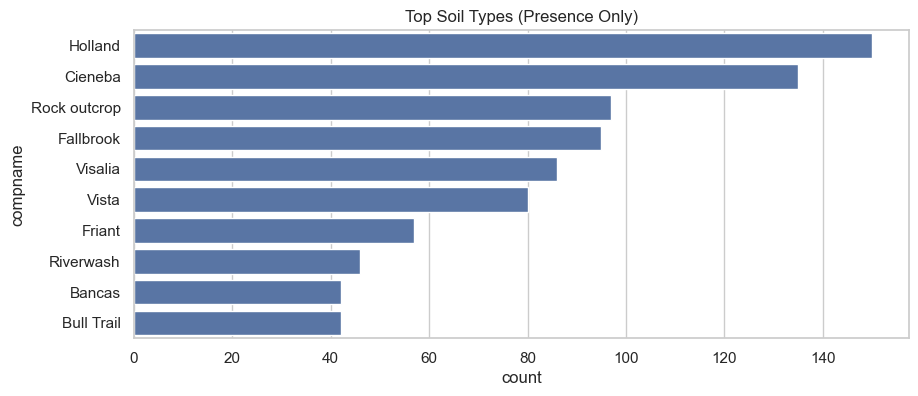

In [9]:
# 6. Bar plots for land cover and soil types
plt.figure(figsize=(10, 4))
sns.countplot(y="land_cover_class", data=gdf, order=gdf["land_cover_class"].value_counts().index)
plt.title("Land Cover Classes (Presence Only)")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(y="compname", data=gdf, order=gdf["compname"].value_counts().head(10).index)
plt.title("Top Soil Types (Presence Only)")
plt.show()

In [10]:
import folium

# Map center
center = [gdf["decimalLatitude"].mean(), gdf["decimalLongitude"].mean()]

# Create map
m = folium.Map(location=center, zoom_start=10, tiles="CartoDB positron")

# Add each point as a small circle
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row["decimalLatitude"], row["decimalLongitude"]],
        radius=3,                  # Small dot
        color="green",             # Border color
        fill=True,
        fill_color="green",        # Fill color
        fill_opacity=0.6,
        weight=0.5
    ).add_to(m)

m


In [11]:
#PRESENCE VERSUS BACKGROUND EDA AS A BRIDGE TO MODELING
#PRESENCE VERSUS BACKGROUND EDA AS A BRIDGE TO MODELING
#PRESENCE VERSUS BACKGROUND EDA AS A BRIDGE TO MODELING

In [12]:
combined_path = "../data/processed/combined_quercus_engelmannii.geojson"
df = gpd.read_file(combined_path)

# Check shape and preview
print(df.shape)
#df.head()
df.info()


(2366, 12)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   decimalLatitude   2366 non-null   float64 
 1   decimalLongitude  2366 non-null   float64 
 2   elevation         2366 non-null   float64 
 3   precip_mm         2366 non-null   float64 
 4   temp_c            2366 non-null   float64 
 5   soil_symbol       2366 non-null   object  
 6   compname          2366 non-null   object  
 7   drainagecl        1913 non-null   object  
 8   land_cover        2366 non-null   int32   
 9   land_cover_class  2366 non-null   object  
 10  presence          2366 non-null   int32   
 11  geometry          2366 non-null   geometry
dtypes: float64(5), geometry(1), int32(2), object(4)
memory usage: 203.5+ KB


[1 0]
int32


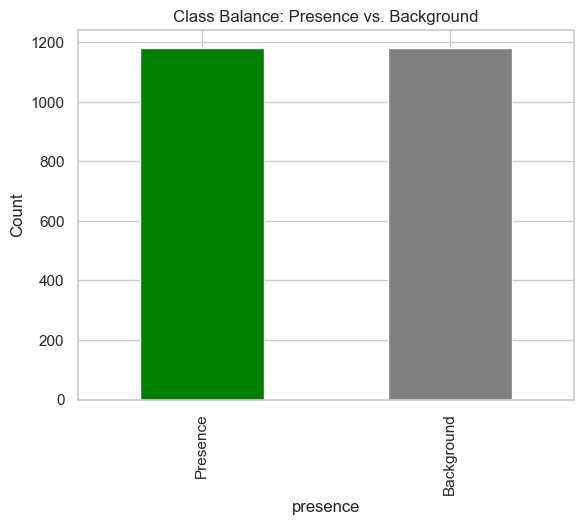

In [13]:
print(df["presence"].unique())
print(df["presence"].dtype)

counts = df["presence"].value_counts()

# Plot
counts.plot(kind='bar', color=['gray' if i == 0 else 'green' for i in counts.index])
plt.title("Class Balance: Presence vs. Background")
plt.xticks(ticks=range(len(counts)), labels=["Background" if i == 0 else "Presence" for i in counts.index])
plt.ylabel("Count")
plt.show()


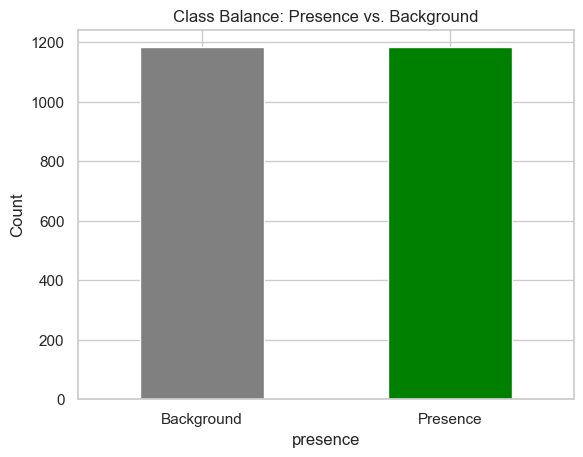

In [14]:
df["presence"].value_counts().plot(kind='bar', color=['gray', 'green'])
plt.title("Class Balance: Presence vs. Background")
plt.xticks([0, 1], ["Background", "Presence"], rotation=0)
plt.ylabel("Count")
plt.show()

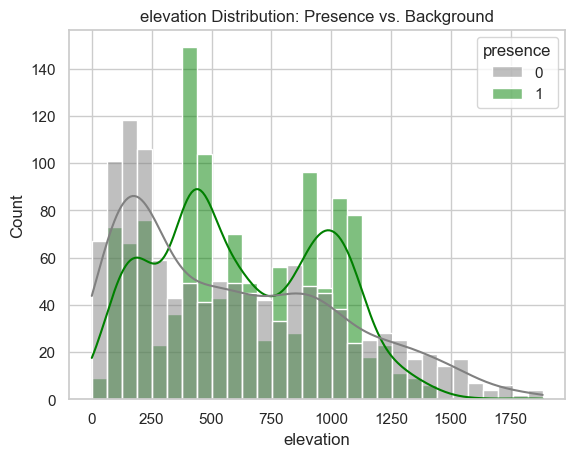

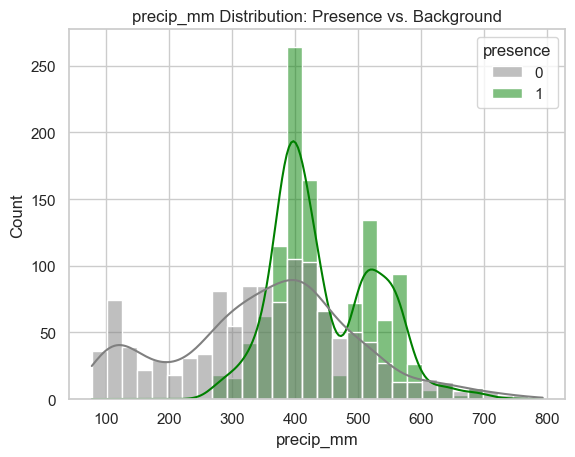

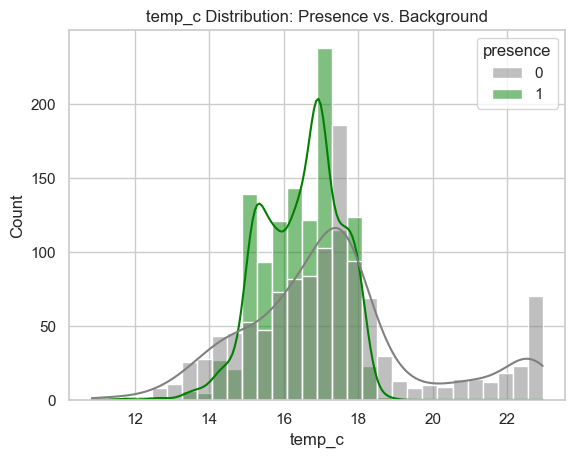

In [15]:
for col in ["elevation", "precip_mm", "temp_c"]:
    plt.figure()
    sns.histplot(data=df, x=col, hue="presence", bins=30, kde=True, palette={0: "gray", 1: "green"})
    plt.title(f"{col} Distribution: Presence vs. Background")
    plt.show()

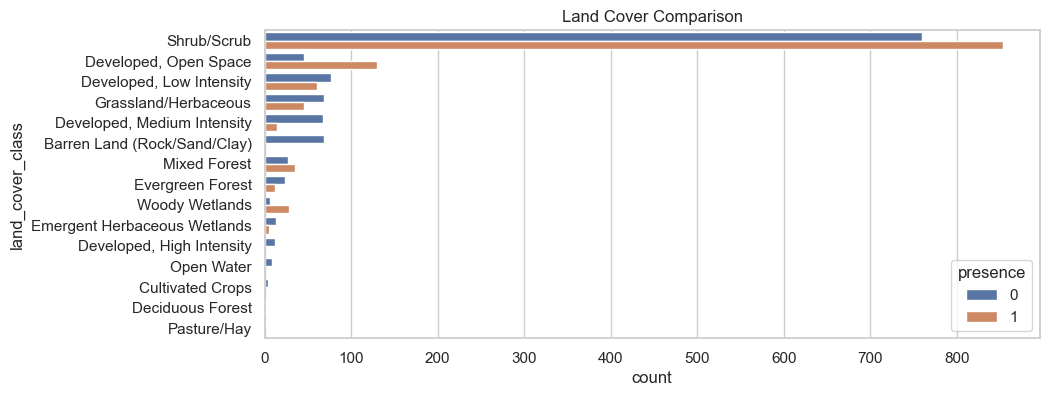

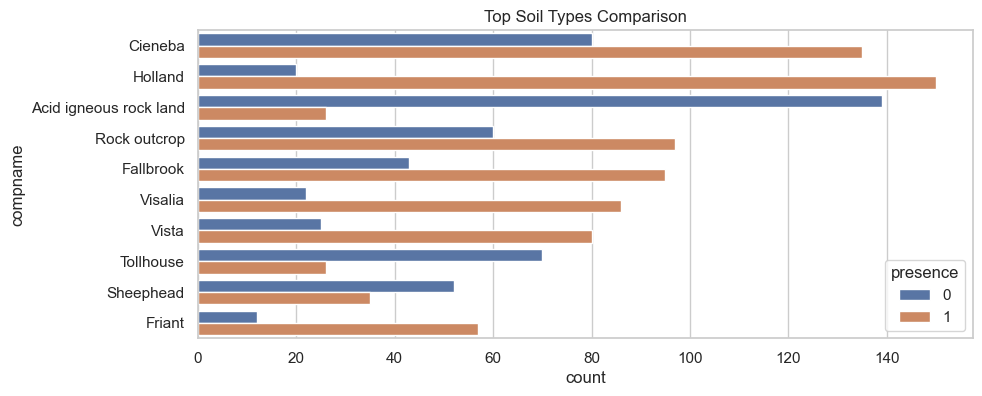

In [16]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y="land_cover_class", hue="presence", 
              order=df["land_cover_class"].value_counts().index)
plt.title("Land Cover Comparison")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, y="compname", hue="presence", 
              order=df["compname"].value_counts().head(10).index)
plt.title("Top Soil Types Comparison")
plt.show()


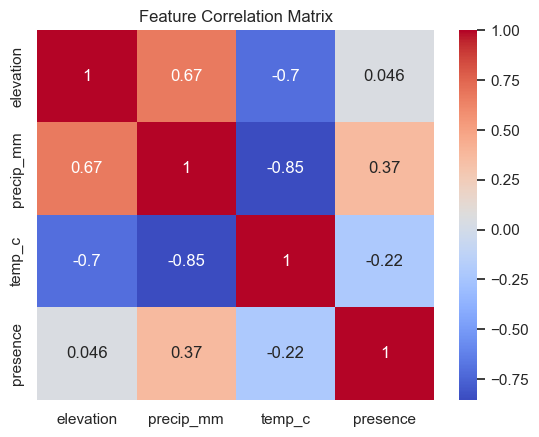

In [17]:
features = ["elevation", "precip_mm", "temp_c"]
corr = df[features + ["presence"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/2069218085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="presence", y=col, palette={'0': "gray", '1': "green"})


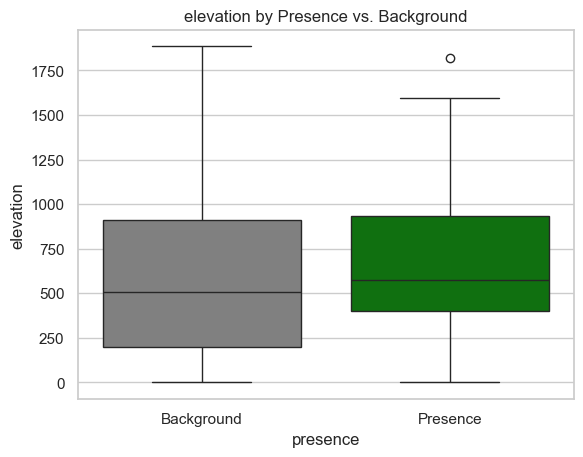

/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/2069218085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="presence", y=col, palette={'0': "gray", '1': "green"})


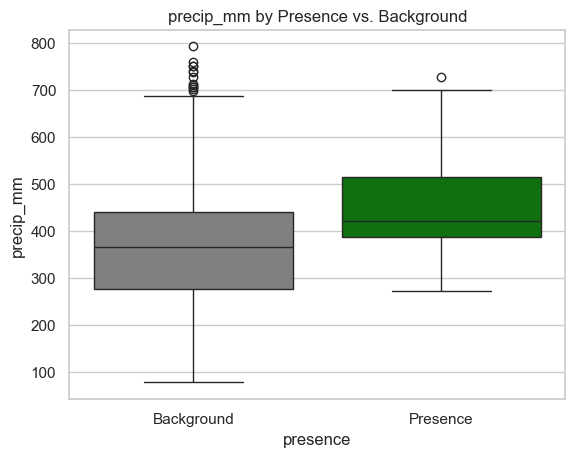

/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/2069218085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="presence", y=col, palette={'0': "gray", '1': "green"})


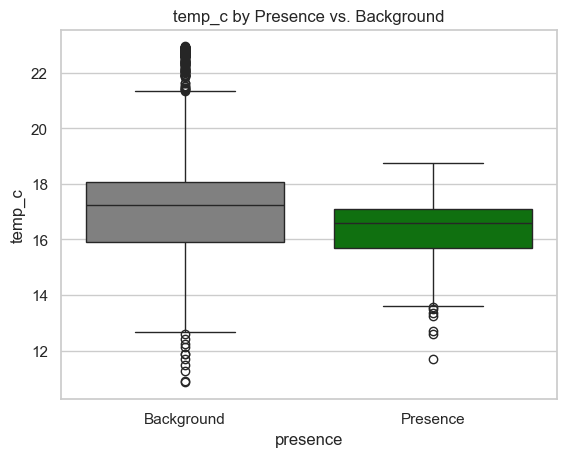

In [18]:
for col in features:
    plt.figure()
    sns.boxplot(data=df, x="presence", y=col, palette={'0': "gray", '1': "green"})
    plt.title(f"{col} by Presence vs. Background")
    plt.xticks([0, 1], ["Background", "Presence"])
    plt.show()

In [19]:
from scipy.stats import ttest_ind
import numpy as np

# Ensure presence column is int
df["presence"] = df["presence"].astype(int)

# Features to compare
features = ["elevation", "precip_mm", "temp_c"]

# Create summary table
summary = []

for col in features:
    pres_vals = df[df["presence"] == 1][col].dropna()
    bg_vals   = df[df["presence"] == 0][col].dropna()
    
    tstat, pval = ttest_ind(pres_vals, bg_vals, equal_var=False)
    
    summary.append({
        "Feature": col,
        "Mean (Presence)": np.round(pres_vals.mean(), 2),
        "Mean (Background)": np.round(bg_vals.mean(), 2),
        "Std Dev (Presence)": np.round(pres_vals.std(), 2),
        "Std Dev (Background)": np.round(bg_vals.std(), 2),
        "T-statistic": np.round(tstat, 2),
        "P-value": f"{pval:.3g}"
    })

# Create DataFrame
summary_df = pd.DataFrame(summary)
summary_df



,Feature,Mean (Presence),Mean (Background),Std Dev (Presence),Std Dev (Background),T-statistic,P-value
0,elevation,626.51,590.11,348.38,444.66,2.22,0.0268
1,precip_mm,446.21,354.86,81.64,142.26,19.16,7.09e-75
2,temp_c,16.45,17.30,1.04,2.40,-11.07,1.74e-27


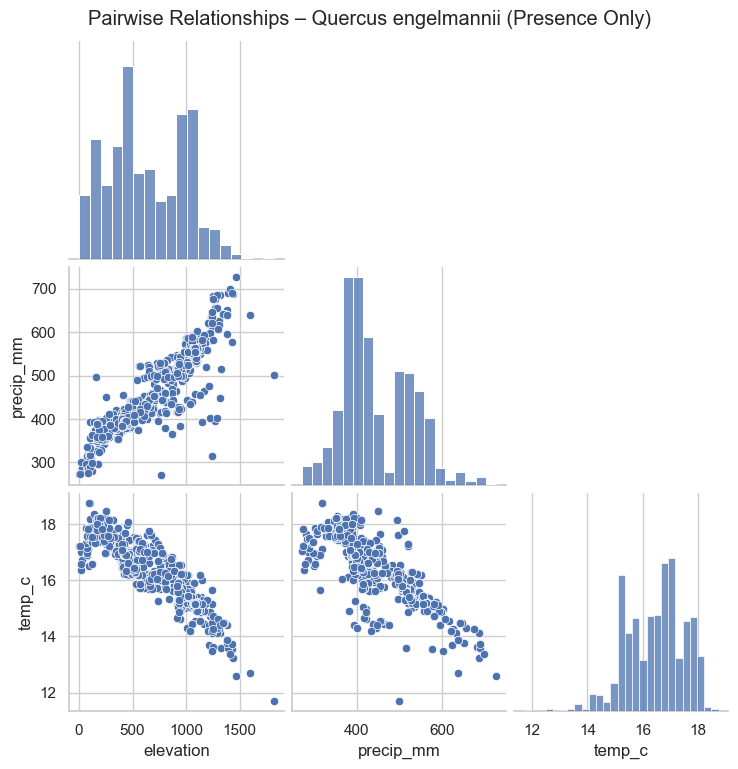

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt

# Filter to presence points only
presence_df = df[df["presence"] == 1][["elevation", "precip_mm", "temp_c"]].copy()

# Create pairplot
sns.pairplot(presence_df, corner=True)
plt.suptitle("Pairwise Relationships – Quercus engelmannii (Presence Only)", y=1.02)
plt.show()


In [21]:
#ONTO MODELIN
#ONTO MODELING
#ONTO MODELING

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define features and target
features = ["elevation", "precip_mm", "temp_c"]
X = df[features]
y = df["presence"]

# 2. Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# 1. Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# 2. Get model coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": np.round(logreg.coef_[0], 3)
})
coef_df["Interpretation"] = coef_df["Coefficient"].apply(
    lambda x: "↑ increases presence" if x > 0 else "↓ decreases presence"
)

# 3. Show coefficients
coef_df


,Feature,Coefficient,Interpretation
0,elevation,-1.201,↓ decreases presence
1,precip_mm,2.105,↑ increases presence
2,temp_c,0.200,↑ increases presence


In [24]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# 1. Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# 2. Get model coefficients
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": np.round(logreg.coef_[0], 3)
})
coef_df["Interpretation"] = coef_df["Coefficient"].apply(
    lambda x: "↑ increases presence" if x > 0 else "↓ decreases presence"
)

# 3. Show coefficients
coef_df


,Feature,Coefficient,Interpretation
0,elevation,-1.201,↓ decreases presence
1,precip_mm,2.105,↑ increases presence
2,temp_c,0.200,↑ increases presence


In [25]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# 1. Predict on test set
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # probabilities
y_pred = logreg.predict(X_test_scaled)              # 0 or 1

# 2. Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"ROC AUC: {auc:.3f}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.719
Precision: 0.661
Recall: 0.899
ROC AUC: 0.738
Confusion Matrix:
[[128 109]
 [ 24 213]]


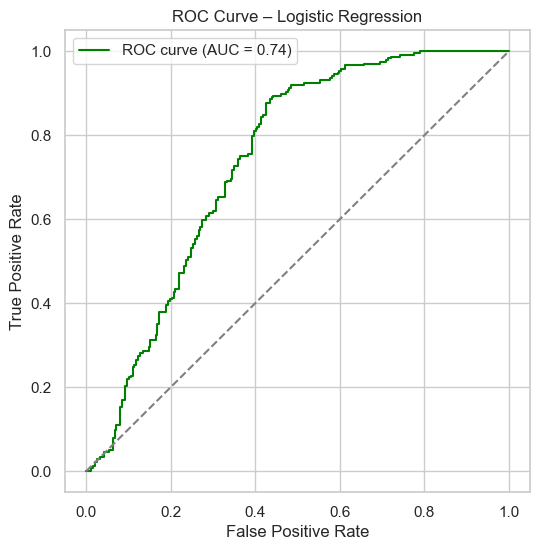

In [26]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# One-hot encode land cover (drop_first avoids multicollinearity)
landcover_dummies = pd.get_dummies(df["land_cover_class"], drop_first=True)

# Combine with numeric features
X_augmented = pd.concat([
    df[["elevation", "precip_mm", "temp_c"]],
    landcover_dummies
], axis=1)

y = df["presence"]


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Fit model
logreg_lc = LogisticRegression(max_iter=1000)
logreg_lc.fit(X_train_scaled, y_train)

# Coefficients
coef_df = pd.DataFrame({
    "Feature": X_augmented.columns,
    "Coefficient": np.round(logreg_lc.coef_[0], 3)
})
coef_df["Interpretation"] = coef_df["Coefficient"].apply(
    lambda x: "↑ increases presence" if x > 0 else "↓ decreases presence"
)

coef_df.sort_values("Coefficient", ascending=False)


,Feature,Coefficient,Interpretation
1,precip_mm,1.981,↑ increases presence
15,Shrub/Scrub,0.665,↑ increases presence
8,"Developed, Open Space",0.479,↑ increases presence
6,"Developed, Low Intensity",0.231,↑ increases presence
16,Woody Wetlands,0.222,↑ increases presence
11,Grassland/Herbaceous,0.088,↑ increases presence
12,Mixed Forest,0.075,↑ increases presence
2,temp_c,0.030,↑ increases presence
7,"Developed, Medium Intensity",0.017,↑ increases presence
9,Emergent Herbaceous Wetlands,-0.002,↓ decreases presence


In [30]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# 1. Predict
y_prob_lc = logreg_lc.predict_proba(X_test_scaled)[:, 1]
y_pred_lc = logreg_lc.predict(X_test_scaled)

# 2. Metrics
acc_lc = accuracy_score(y_test, y_pred_lc)
prec_lc = precision_score(y_test, y_pred_lc)
rec_lc = recall_score(y_test, y_pred_lc)
auc_lc = roc_auc_score(y_test, y_prob_lc)
cm_lc = confusion_matrix(y_test, y_pred_lc)

# 3. Print metrics
print(f"Accuracy: {acc_lc:.3f}")
print(f"Precision: {prec_lc:.3f}")
print(f"Recall: {rec_lc:.3f}")
print(f"ROC AUC: {auc_lc:.3f}")
print("Confusion Matrix:")
print(cm_lc)


Accuracy: 0.713
Precision: 0.669
Recall: 0.844
ROC AUC: 0.762
Confusion Matrix:
[[138  99]
 [ 37 200]]


In [31]:
X_augmented = pd.concat([
    df[["elevation", "precip_mm", "temp_c"]],
    pd.get_dummies(df["land_cover_class"], drop_first=True)
], axis=1)
y = df["presence"]


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.2, random_state=42)

# Note: Random Forest doesn't need scaling, but you can still use scaled data if already prepared
# We'll use unscaled X_train and X_test for Random Forest


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve
)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {acc_rf:.3f}")
print(f"Precision: {prec_rf:.3f}")
print(f"Recall: {rec_rf:.3f}")
print(f"ROC AUC: {auc_rf:.3f}")
print("Confusion Matrix:")
print(cm_rf)


Accuracy: 0.844
Precision: 0.825
Recall: 0.873
ROC AUC: 0.912
Confusion Matrix:
[[193  44]
 [ 30 207]]


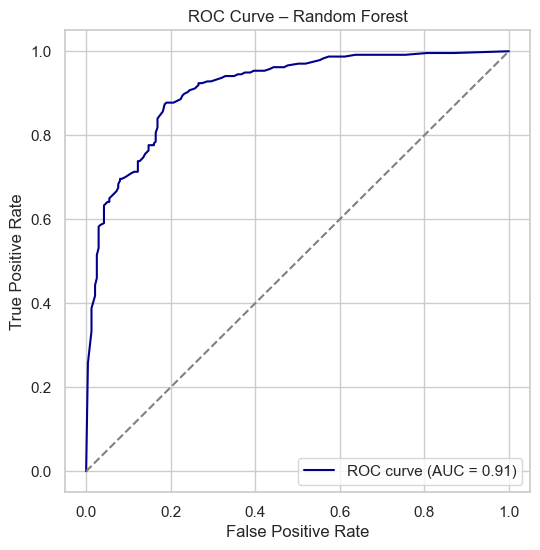

In [35]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC curve (AUC = {auc_rf:.2f})", color="darkblue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/1249287490.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


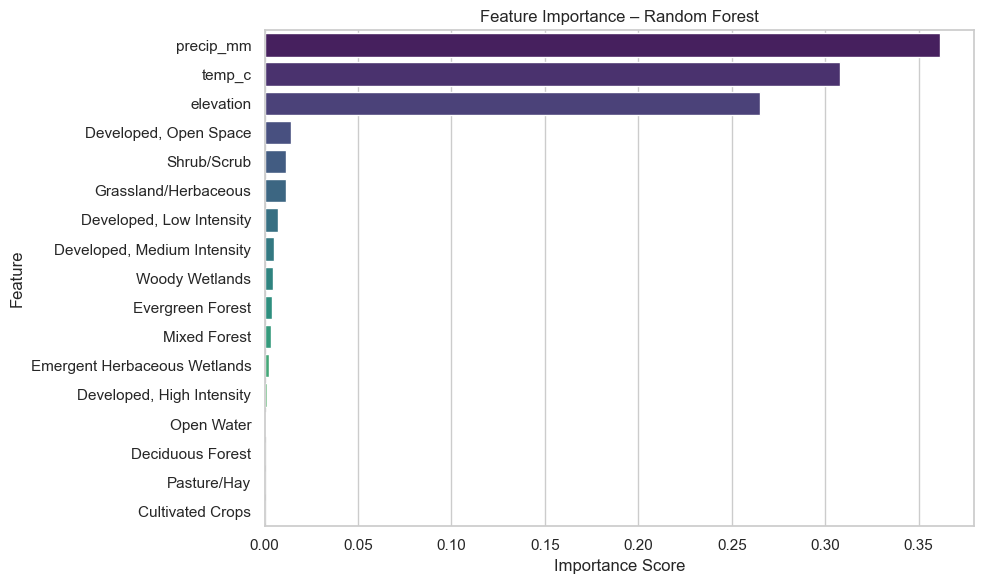

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf.feature_importances_
feature_names = X_augmented.columns

# Create a DataFrame and sort
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [37]:
# Print feature importances in descending order
for feature, importance in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature:<30} {importance:.4f}")



precip_mm                      0.3615
temp_c                         0.3080
elevation                      0.2649
Developed, Open Space          0.0142
Shrub/Scrub                    0.0114
Grassland/Herbaceous           0.0113
Developed, Low Intensity       0.0071
Developed, Medium Intensity    0.0049
Woody Wetlands                 0.0044
Evergreen Forest               0.0039
Mixed Forest                   0.0033
Emergent Herbaceous Wetlands   0.0022
Developed, High Intensity      0.0014
Open Water                     0.0009
Deciduous Forest               0.0003
Pasture/Hay                    0.0001
Cultivated Crops               0.0000


In [38]:
# ERROR ERROR ERROR

In [39]:
# # 1. Print CRS of both layers
# print("✅ CRS Check:")
# print("Grid CRS:     ", grid_with_predictions.crs)
# print("Boundary CRS: ", boundary.crs)

# # 2. Print first few coordinate points
# print("\n✅ Coordinate Preview:")
# print("Grid sample:")
# print(grid_with_predictions.geometry.head())

# print("\nBoundary sample:")
# print(boundary.geometry.head())

# # 3. Print bounds to ensure overlap
# print("\n✅ Bounding Box Check:")
# print("Grid bounds:     ", grid_with_predictions.total_bounds)
# print("Boundary bounds: ", boundary.total_bounds)

# # 4. Check if any grid points are within the boundary
# print("\n✅ Overlap Check:")
# overlap = grid_with_predictions.geometry.within(boundary.unary_union)
# print("Points inside boundary:", overlap.sum(), "out of", len(grid_with_predictions))


In [40]:
# import sys
# import os

# # Add the scripts directory to the Python path
# script_dir = os.path.abspath("../scripts")
# if script_dir not in sys.path:
#     sys.path.append(script_dir)

# from prediction_grid_pipeline import run_full_prediction_pipeline, plot_suitability_map, generate_clean_prediction_grid

# species = "quercus_engelmannii"

# # Run the full pipeline
# grid_with_predictions = run_full_prediction_pipeline(species, rf_model=rf, X_reference=X_augmented)

# # Plot the result
# plot_suitability_map(grid_with_predictions)

In [41]:
# from prediction_grid_pipeline import run_full_prediction_pipeline, plot_suitability_map

# grid_with_predictions = run_full_prediction_pipeline(
#     "quercus_engelmannii",
#     rf_model=rf,
#     X_reference=X_augmented
# )

# plot_suitability_map(grid_with_predictions)


In [42]:
# import geopandas as gpd
# import rasterio
# from shapely.geometry import Point
# import numpy as np

# # Load the grid (from your full pipeline or directly)
# grid = generate_clean_prediction_grid("quercus_engelmannii")

# # Load the DEM to match CRS
# with rasterio.open("../data/processed/merged_dem.tif") as src:
#     dem_crs = src.crs

# # Load the boundary in the DEM's CRS
# boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs(dem_crs)

# # 1. CRS check
# print("✅ CRS Check:")
# print("Grid CRS:     ", grid.crs)
# print("Boundary CRS: ", boundary.crs)

# # 2. Geometry preview
# print("\n✅ Coordinate Preview:")
# print("Grid sample:")
# print(grid.geometry.head())

# print("\nBoundary sample:")
# print(boundary.geometry.head())

# # 3. Bounds check
# print("\n✅ Bounding Box Check:")
# print("Grid bounds:     ", grid.total_bounds)
# print("Boundary bounds: ", boundary.total_bounds)

# # 4. Overlap check
# print("\n✅ Overlap Check:")
# overlap = grid.geometry.within(boundary.unary_union)
# print("Points inside boundary:", overlap.sum(), "out of", len(grid))


In [47]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

# Step 1: Load county boundary
boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs("EPSG:4269")

# Step 2: Create grid points in degrees
minx, miny, maxx, maxy = boundary.total_bounds
x_coords = np.arange(minx, maxx, 0.01)
y_coords = np.arange(miny, maxy, 0.01)
points = [Point(x, y) for x in x_coords for y in y_coords]

# Step 3: Filter points inside boundary
grid = gpd.GeoDataFrame(geometry=points, crs="EPSG:4269")
grid = grid[grid.geometry.within(boundary.unary_union)]

print(f"✅ Generated {len(grid)} grid points.")
grid.head()


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/3973687221.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = grid[grid.geometry.within(boundary.unary_union)]


✅ Generated 10689 grid points.


,geometry
183,POINT (-117.58618 33.38427)
184,POINT (-117.58618 33.39427)
185,POINT (-117.58618 33.40427)
186,POINT (-117.58618 33.41427)
187,POINT (-117.58618 33.42427)


In [48]:
from enrich_species import extract_elevation, extract_climate, extract_land_cover

# Enrich
grid = extract_elevation("quercus_engelmannii", grid)
grid = extract_climate("quercus_engelmannii", grid)
grid = extract_land_cover("quercus_engelmannii", grid)

# One-hot encode land cover
lc_dummies = pd.get_dummies(grid["land_cover_class"], drop_first=True)
grid_X = pd.concat([grid[["elevation", "precip_mm", "temp_c"]], lc_dummies], axis=1)

# Align with training columns
for col in set(X_augmented.columns) - set(grid_X.columns):
    grid_X[col] = 0
grid_X = grid_X[X_augmented.columns]

# Predict
grid["suitability"] = rf.predict_proba(grid_X)[:, 1]
print(grid.size)
grid.head()


Loading elevation-enriched data for quercus_engelmannii...
Loading climate-enriched data for quercus_engelmannii...
Loading land-cover-enriched data for quercus_engelmannii...
80444


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,compname,drainagecl,majcompflag,musym,muname,areasymbol,land_cover,land_cover_class,geometry,suitability
0,891746802,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/416308,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,Rock outcrop,None,Yes,CnE2,"Cieneba-Fallbrook rocky sandy loams, 9 to 30 p...",CA638,52,Shrub/Scrub,POINT (-1925159.98728 1297636.9861),0.85
1,3773764646,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/11604...,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,Bosanko,Well drained,Yes,BtC,"Bosanko stony clay, 5 to 9 percent slopes",CA638,52,Shrub/Scrub,POINT (-1917327.6991 1293890.7059),1.00
2,3773801388,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/11603...,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,Friant,Well drained,Yes,FxE,"Friant rocky fine sandy loam, 9 to 30 percent ...",CA638,52,Shrub/Scrub,POINT (-1935960.70468 1340878.48889),0.87
3,3784994150,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/11724...,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,Holland,Well drained,Yes,HnE,"Holland stony fine sandy loam, 5 to 30 percent...",CA638,52,Shrub/Scrub,POINT (-1899223.60942 1323802.96265),0.91
4,3858199707,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/87934818,Plantae,Tracheophyta,Magnoliopsida,Fagales,Fagaceae,Quercus,Quercus engelmannii,...,Rock outcrop,None,Yes,CmrG,"Cieneba-Rock outcrop complex, 30 to 75 percent...",CA638,52,Shrub/Scrub,POINT (-1925566.73796 1305944.36485),0.86


In [52]:
print("✅ CRS Check:")
print("Grid CRS:", grid.crs)

print("\n✅ Geometry Preview:")
print(grid.geometry.head())

print("\n✅ Suitability Preview:")
print(grid['suitability'].describe())

print("\n✅ Grid Shape:", grid.shape)

print("\n✅ Null Check:")
print("Missing geometry:", grid.geometry.isna().sum())
print("Missing suitability:", grid['suitability'].isna().sum())

print("\n✅ Bounds Check:")
print("Grid bounds:", grid.total_bounds)


✅ CRS Check:
Grid CRS: EPSG:4326

✅ Geometry Preview:
0     POINT (-1925159.98728 1297636.9861)
1      POINT (-1917327.6991 1293890.7059)
2    POINT (-1935960.70468 1340878.48889)
3    POINT (-1899223.60942 1323802.96265)
4    POINT (-1925566.73796 1305944.36485)
Name: geometry, dtype: geometry

✅ Suitability Preview:
count    1183.000000
mean        0.905334
std         0.149474
min         0.000000
25%         0.880000
50%         0.970000
75%         1.000000
max         1.000000
Name: suitability, dtype: float64

✅ Grid Shape: (1183, 68)

✅ Null Check:
Missing geometry: 0
Missing suitability: 0

✅ Bounds Check:
Grid bounds: [-1959581.60570906  1264667.6782101  -1873677.30831865  1378157.56477952]


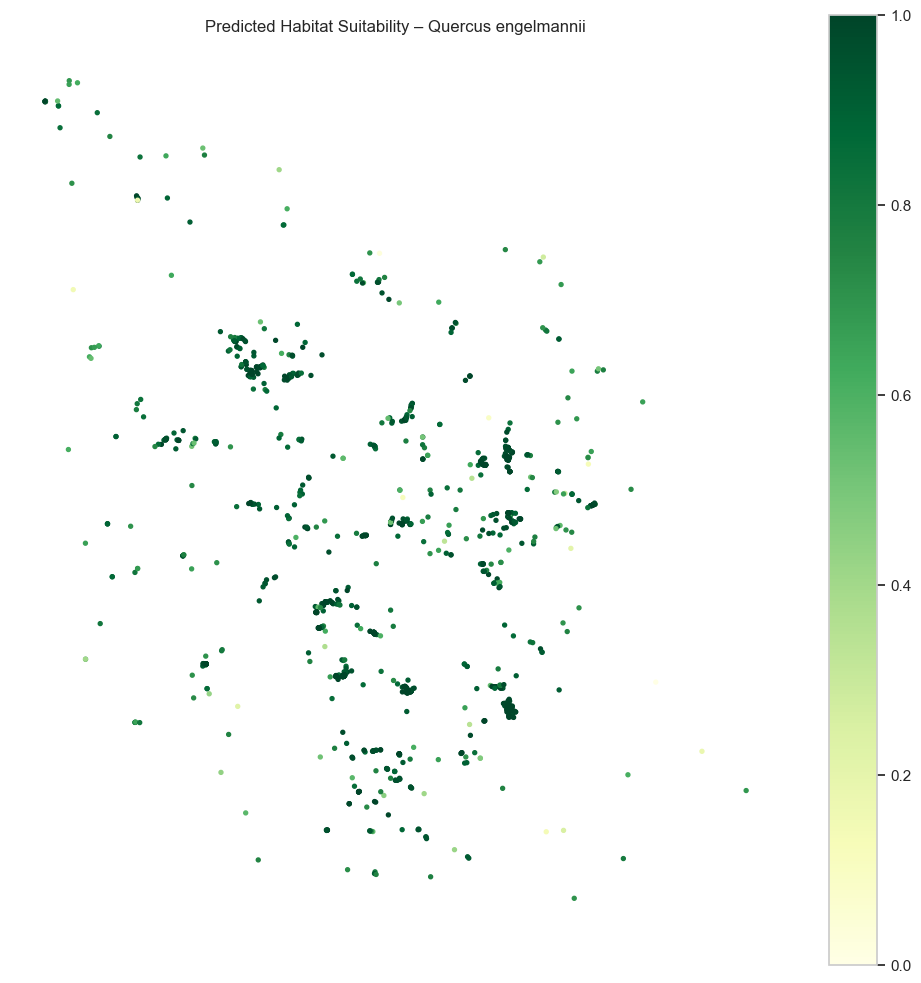

In [54]:
import matplotlib.pyplot as plt

# 1. Fix CRS
grid = grid.set_crs("EPSG:26911", allow_override=True)
grid = grid.to_crs("EPSG:4326")

# 2. Drop invalid or missing rows
grid = grid[grid.geometry.notnull() & grid.is_valid & grid["suitability"].notnull()]

# 3. Plot only suitability points
fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(ax=ax, column="suitability", cmap="YlGn", markersize=8, legend=True)

ax.set_title("Predicted Habitat Suitability – Quercus engelmannii")
plt.axis("off")
plt.tight_layout()
plt.show()


In [55]:
print("Total points in grid:", len(grid))


Total points in grid: 1183


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/4192203785.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = grid[grid.geometry.within(boundary.unary_union)]


✅ Grid created: 42612 points
Loading elevation-enriched data for quercus_engelmannii...
Loading climate-enriched data for quercus_engelmannii...
Loading land-cover-enriched data for quercus_engelmannii...


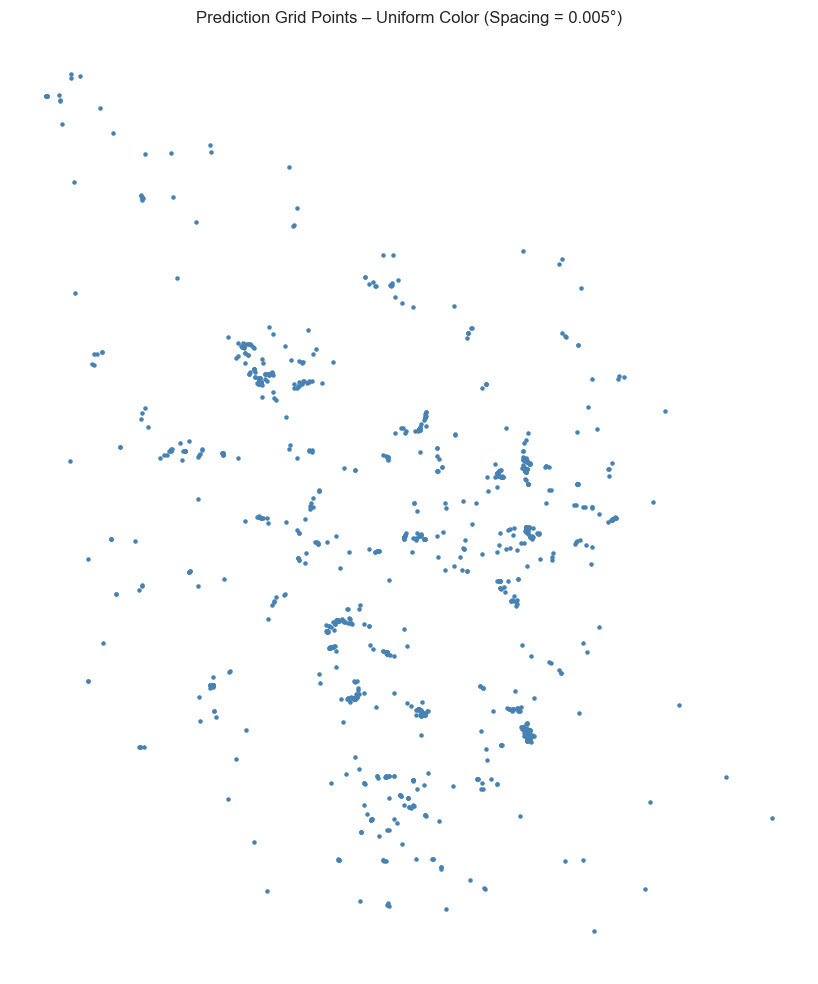

In [56]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from enrich_species import extract_elevation, extract_climate, extract_land_cover

# Step 1: Load boundary and generate higher-resolution grid
crs = "EPSG:4269"
boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs(crs)

minx, miny, maxx, maxy = boundary.total_bounds
x_coords = np.arange(minx, maxx, 0.005)
y_coords = np.arange(miny, maxy, 0.005)
points = [Point(x, y) for x in x_coords for y in y_coords]

grid = gpd.GeoDataFrame(geometry=points, crs=crs)
grid = grid[grid.geometry.within(boundary.unary_union)]

print(f"✅ Grid created: {len(grid)} points")

# Step 2: Enrich and predict
grid = extract_elevation("quercus_engelmannii", grid)
grid = extract_climate("quercus_engelmannii", grid)
grid = extract_land_cover("quercus_engelmannii", grid)

lc_dummies = pd.get_dummies(grid["land_cover_class"], drop_first=True)
grid_X = pd.concat([grid[["elevation", "precip_mm", "temp_c"]], lc_dummies], axis=1)

for col in set(X_augmented.columns) - set(grid_X.columns):
    grid_X[col] = 0
grid_X = grid_X[X_augmented.columns]

grid["suitability"] = rf.predict_proba(grid_X)[:, 1]

# Step 3: Plot uniform points to check spacing
grid = grid.set_crs("EPSG:26911", allow_override=True).to_crs("EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(ax=ax, color="steelblue", markersize=5)
plt.title("Prediction Grid Points – Uniform Color (Spacing = 0.005°)")
plt.axis("off")
plt.tight_layout()
plt.show()


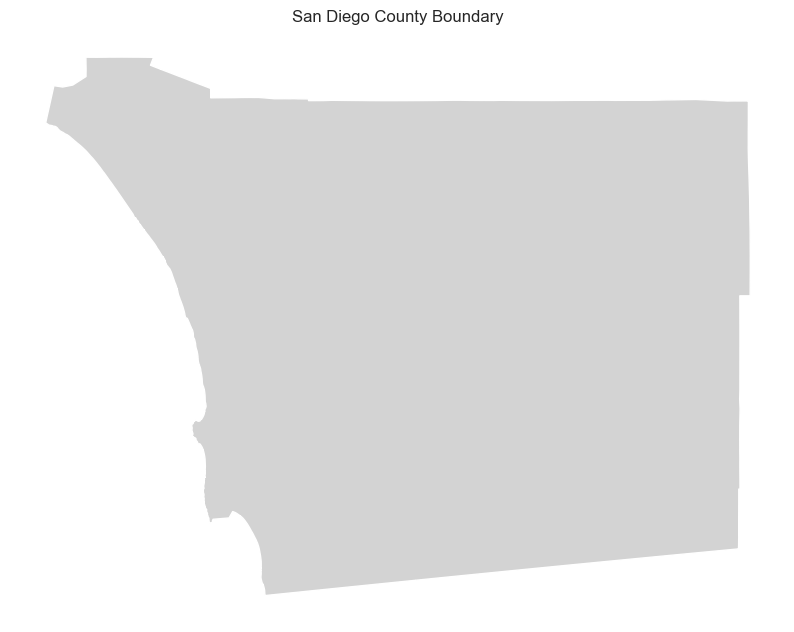

Points before filtering: 59280


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/556476798.py:28: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = grid[grid.geometry.within(boundary.unary_union)]


Points after filtering: 42612
✅ Grid created: 42612 points


In [57]:
import geopandas as gpd  
import numpy as np  
from shapely.geometry import Point  
import matplotlib.pyplot as plt  
  
# Step 1: Load boundary and generate higher-resolution grid  
crs = "EPSG:4269"  
boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs(crs)  
  
# Visualize the boundary  
fig, ax = plt.subplots(figsize=(10, 10))  
boundary.plot(ax=ax, color='lightgrey')  
plt.title("San Diego County Boundary")  
plt.axis("off")  
plt.show()  
  
minx, miny, maxx, maxy = boundary.total_bounds  
x_coords = np.arange(minx, maxx, 0.005)  
y_coords = np.arange(miny, maxy, 0.005)  
points = [Point(x, y) for x in x_coords for y in y_coords]  
  
grid = gpd.GeoDataFrame(geometry=points, crs=crs)  
  
# Check number of points before filtering  
print(f"Points before filtering: {len(grid)}")  
  
# Filter points within the boundary  
grid = grid[grid.geometry.within(boundary.unary_union)]  
  
# Check number of points after filtering  
print(f"Points after filtering: {len(grid)}")  
  
print(f"✅ Grid created: {len(grid)} points")  
  
# Continue with enrichment and prediction...  

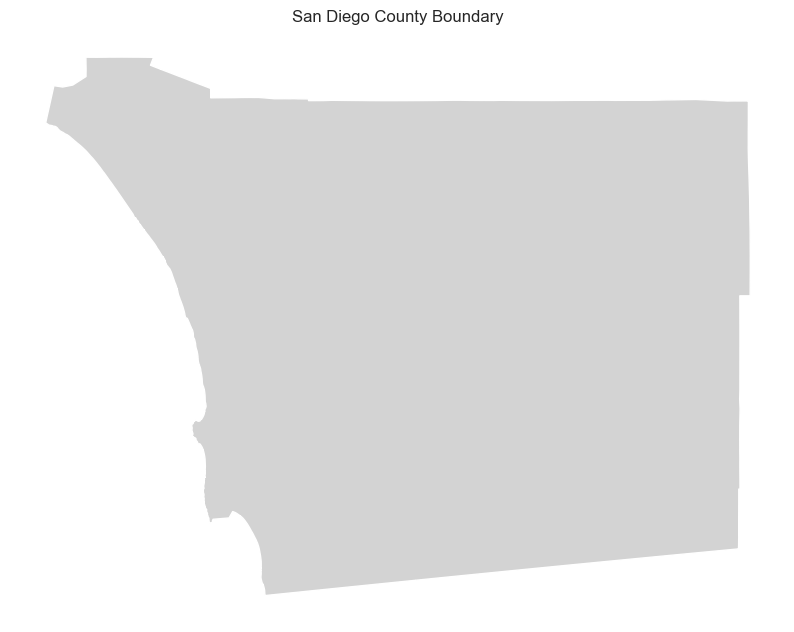

Points before filtering: 59280


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/300155032.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = grid[grid.geometry.within(boundary.unary_union)]


Points after filtering: 42612
✅ Grid created: 42612 points


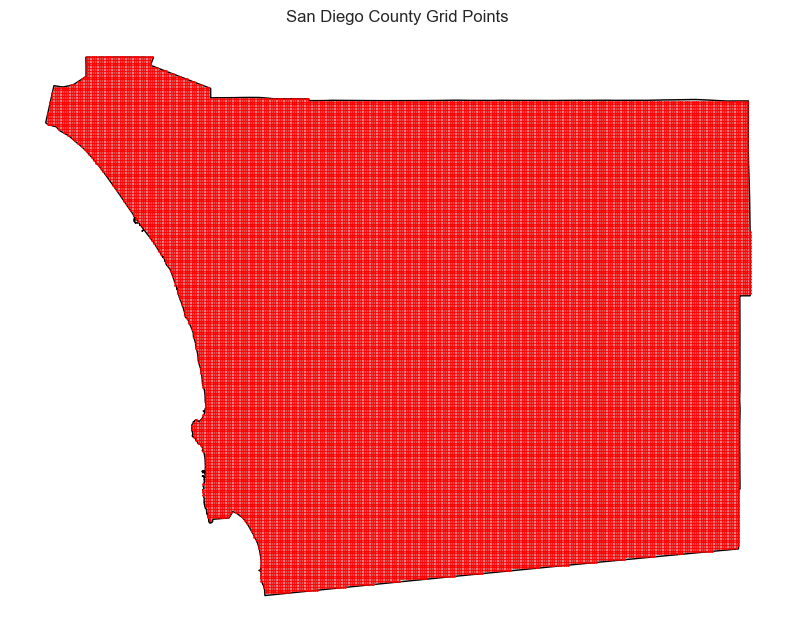

In [58]:
import geopandas as gpd  
import numpy as np  
from shapely.geometry import Point  
import matplotlib.pyplot as plt  
  
# Step 1: Load boundary and generate higher-resolution grid  
crs = "EPSG:4269"  
boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs(crs)  
  
# Visualize the boundary alone (optional step)
fig, ax = plt.subplots(figsize=(10, 10))  
boundary.plot(ax=ax, color='lightgrey')  
plt.title("San Diego County Boundary")  
plt.axis("off")  
plt.show()  
  
# Step 2: Generate grid points across the bounding box  
minx, miny, maxx, maxy = boundary.total_bounds  
x_coords = np.arange(minx, maxx, 0.005)  
y_coords = np.arange(miny, maxy, 0.005)  
points = [Point(x, y) for x in x_coords for y in y_coords]  
grid = gpd.GeoDataFrame(geometry=points, crs=crs)  
  
# Step 3: Filter points to keep only those within the county boundary  
print(f"Points before filtering: {len(grid)}")  
grid = grid[grid.geometry.within(boundary.unary_union)]  
print(f"Points after filtering: {len(grid)}")  
print(f"✅ Grid created: {len(grid)} points")  
  
# Step 4: Visualize boundary and grid points together  
fig, ax = plt.subplots(figsize=(10, 10))  
boundary.plot(ax=ax, color='lightgrey', edgecolor='black')  # Optional: add edge for clarity  
grid.plot(ax=ax, color='red', markersize=1)  # small red points for the grid  
plt.title("San Diego County Grid Points")  
plt.axis("off")  
plt.show()

# Continue with enrichment and prediction...


Points before filtering: 59280


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/2701820403.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = grid[grid.geometry.within(boundary.unary_union)]


Points after filtering: 42612
✅ Grid created: 42612 points
Loading elevation-enriched data for quercus_engelmannii...
Loading climate-enriched data for quercus_engelmannii...
Loading land-cover-enriched data for quercus_engelmannii...


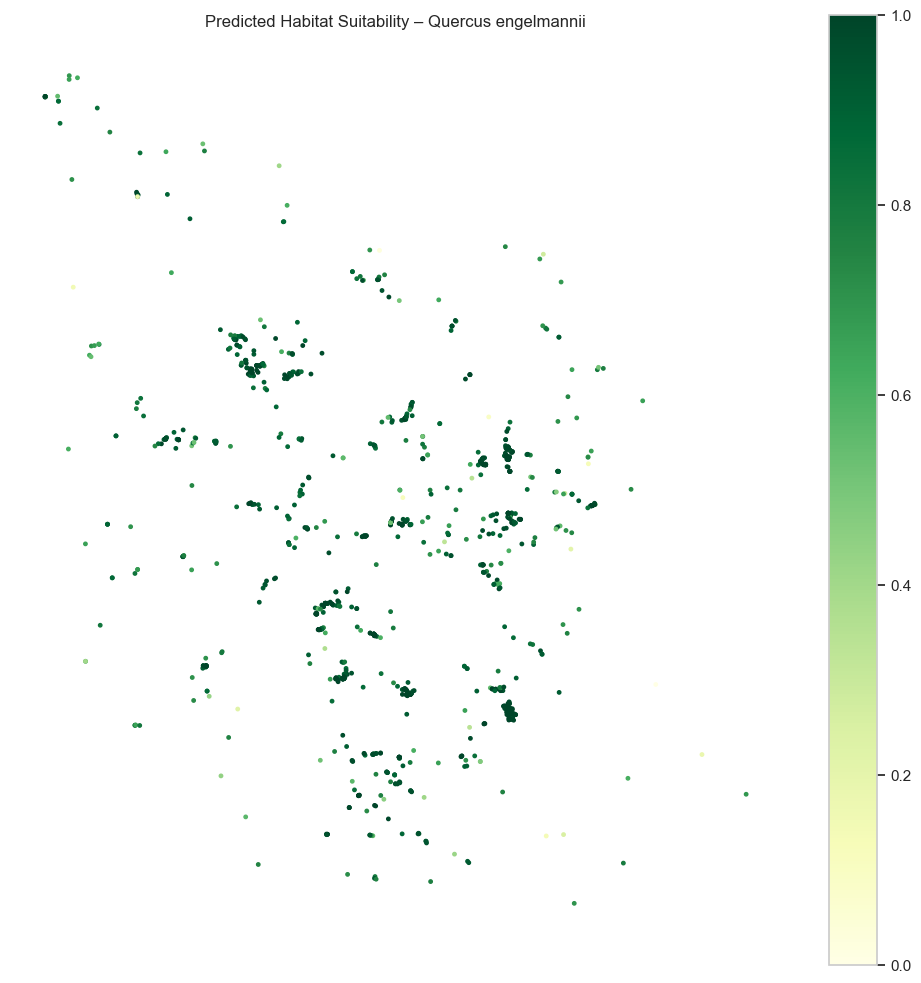

In [59]:
import geopandas as gpd  
import numpy as np  
from shapely.geometry import Point  
import matplotlib.pyplot as plt  
from enrich_species import extract_elevation, extract_climate, extract_land_cover

# Step 1: Load boundary and generate high-resolution grid  
crs = "EPSG:4269"  
boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs(crs)  
  
# Step 2: Generate grid points across the bounding box  
minx, miny, maxx, maxy = boundary.total_bounds  
x_coords = np.arange(minx, maxx, 0.005)  
y_coords = np.arange(miny, maxy, 0.005)  
points = [Point(x, y) for x in x_coords for y in y_coords]  
grid = gpd.GeoDataFrame(geometry=points, crs=crs)  
  
# Step 3: Filter points to keep only those within the county boundary  
print(f"Points before filtering: {len(grid)}")  
grid = grid[grid.geometry.within(boundary.unary_union)]  
print(f"Points after filtering: {len(grid)}")  
print(f"✅ Grid created: {len(grid)} points")  

# Step 4: Enrich the grid with environmental data
grid = extract_elevation("quercus_engelmannii", grid)
grid = extract_climate("quercus_engelmannii", grid)
grid = extract_land_cover("quercus_engelmannii", grid)

# Step 5: Predict suitability using your trained model
lc_dummies = pd.get_dummies(grid["land_cover_class"], drop_first=True)
grid_X = pd.concat([grid[["elevation", "precip_mm", "temp_c"]], lc_dummies], axis=1)

# Align with training columns
for col in set(X_augmented.columns) - set(grid_X.columns):
    grid_X[col] = 0
grid_X = grid_X[X_augmented.columns]

grid["suitability"] = rf.predict_proba(grid_X)[:, 1]

# Step 6: Reproject to WGS84 for visualization
grid = grid.set_crs("EPSG:26911", allow_override=True).to_crs("EPSG:4326")

# Step 7: Plot the suitability map
fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(ax=ax, column="suitability", cmap="YlGn", markersize=6, legend=True)
ax.set_title("Predicted Habitat Suitability – Quercus engelmannii")
plt.axis("off")
plt.tight_layout()
plt.show()


Points before filtering: 59280


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/2743953787.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = grid[grid.geometry.within(boundary.unary_union)]


Points after filtering: 42612
✅ Grid created: 42612 points


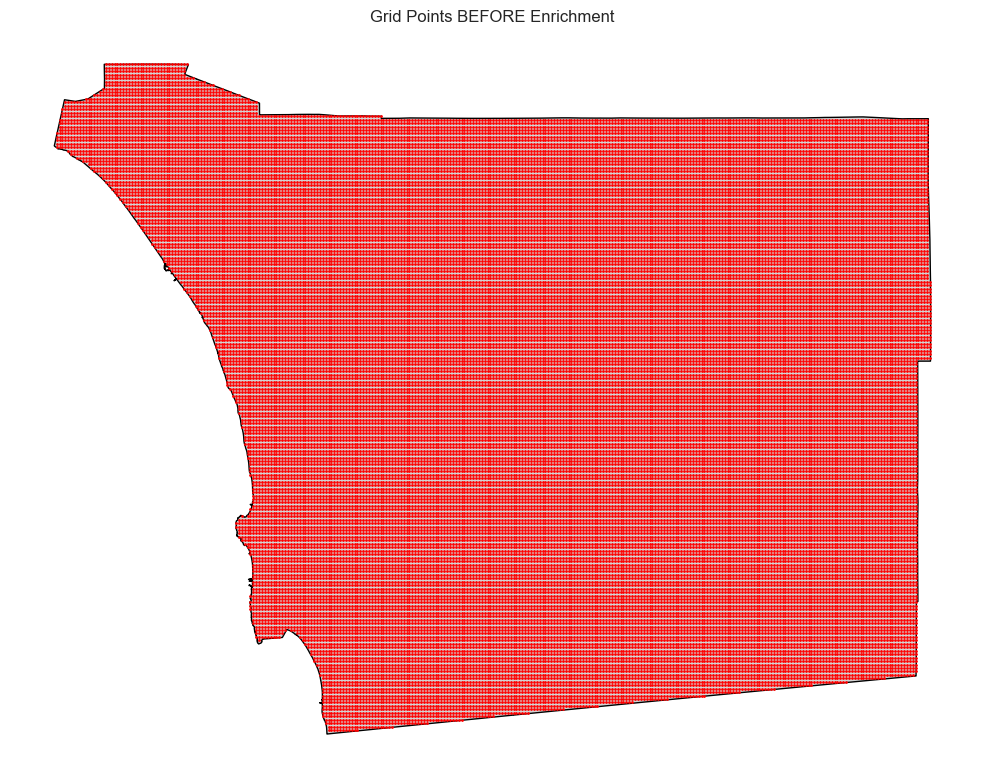

After elevation enrichment: 42612
Loading elevation-enriched data for quercus_engelmannii...
After climate enrichment: 1183
Loading climate-enriched data for quercus_engelmannii...
After land cover enrichment: 1183
Loading land-cover-enriched data for quercus_engelmannii...


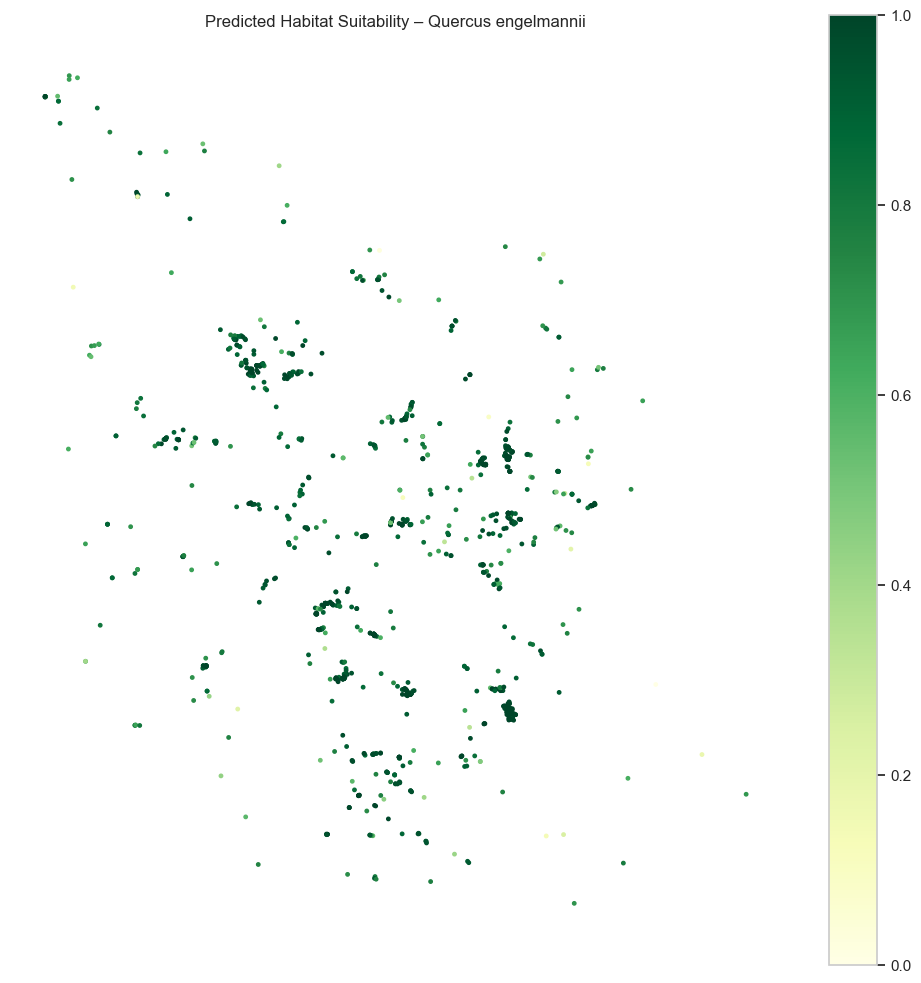

In [62]:
import geopandas as gpd  
import numpy as np  
from shapely.geometry import Point  
import matplotlib.pyplot as plt  
from enrich_species import extract_elevation, extract_climate, extract_land_cover

# Step 1: Load boundary and generate high-resolution grid  
crs = "EPSG:4269"  
boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs(crs)  
  
# Step 2: Generate grid points across the bounding box  
minx, miny, maxx, maxy = boundary.total_bounds  
x_coords = np.arange(minx, maxx, 0.005)  
y_coords = np.arange(miny, maxy, 0.005)  
points = [Point(x, y) for x in x_coords for y in y_coords]  
grid = gpd.GeoDataFrame(geometry=points, crs=crs)  
  
# Step 3: Filter points to keep only those within the county boundary  
print(f"Points before filtering: {len(grid)}")  
grid = grid[grid.geometry.within(boundary.unary_union)]  
print(f"Points after filtering: {len(grid)}")  
print(f"✅ Grid created: {len(grid)} points")  

# 👉 NEW: Preview grid before enrichment
fig, ax = plt.subplots(figsize=(10, 10))
boundary.plot(ax=ax, color='lightgrey', edgecolor='black')
grid.plot(ax=ax, color='red', markersize=1)
plt.title("Grid Points BEFORE Enrichment")
plt.axis("off")
plt.tight_layout()
plt.show()

# Step 4: Enrich the grid with environmental data
print("After elevation enrichment:", len(grid))
grid = extract_elevation("quercus_engelmannii", grid)

print("After climate enrichment:", len(grid))
grid = extract_climate("quercus_engelmannii", grid)

print("After land cover enrichment:", len(grid))
grid = extract_land_cover("quercus_engelmannii", grid)


# Step 5: Predict suitability using your trained model
lc_dummies = pd.get_dummies(grid["land_cover_class"], drop_first=True)
grid_X = pd.concat([grid[["elevation", "precip_mm", "temp_c"]], lc_dummies], axis=1)

# Align with training columns
for col in set(X_augmented.columns) - set(grid_X.columns):
    grid_X[col] = 0
grid_X = grid_X[X_augmented.columns]

grid["suitability"] = rf.predict_proba(grid_X)[:, 1]

# Step 6: Reproject to WGS84 for visualization
grid = grid.set_crs("EPSG:26911", allow_override=True).to_crs("EPSG:4326")

# Step 7: Plot the suitability map
fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(ax=ax, column="suitability", cmap="YlGn", markersize=6, legend=True)
ax.set_title("Predicted Habitat Suitability – Quercus engelmannii")
plt.axis("off")
plt.tight_layout()
plt.show()


Points before filtering: 59280


/var/folders/90/rgvcgnfn2lsbc4fprz790z8c0000gn/T/ipykernel_28564/457307157.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid = grid[grid.geometry.within(boundary.unary_union)]


Points after filtering: 42612
✅ Grid created: 42612 points


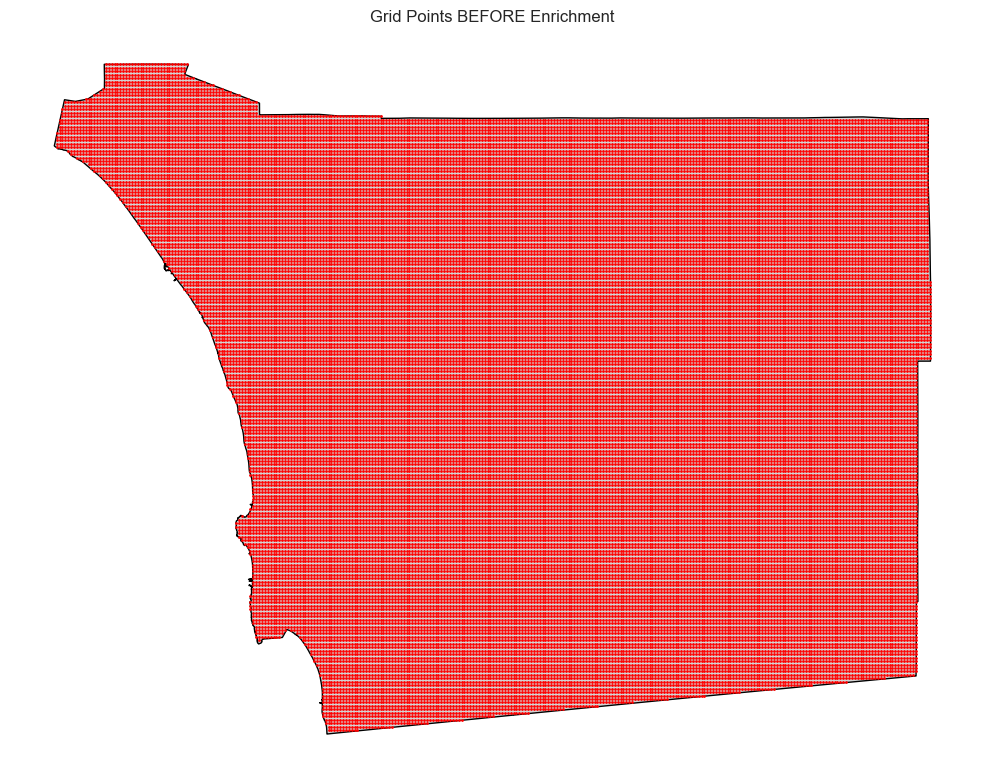

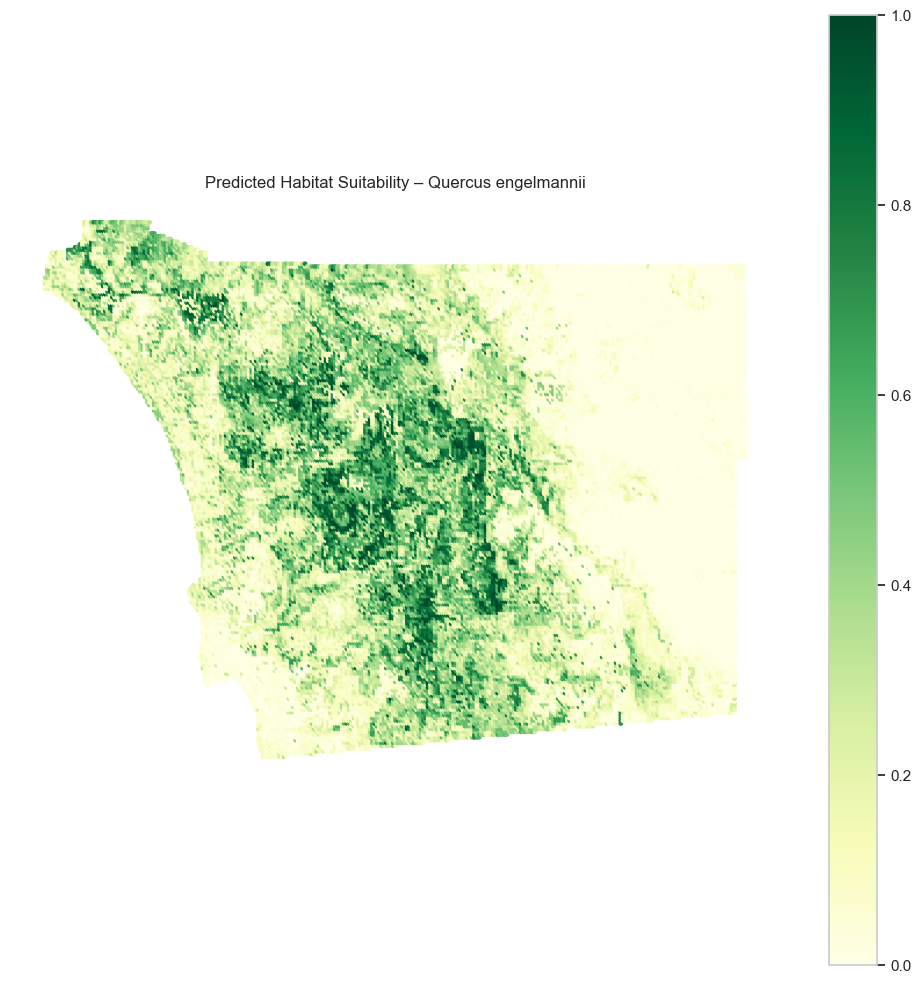

In [63]:
import geopandas as gpd  
import numpy as np  
from shapely.geometry import Point  
import matplotlib.pyplot as plt  
import rasterio

# Step 1: Load boundary and generate high-resolution grid  
crs = "EPSG:4269"  
boundary = gpd.read_file("../data/raw/San_Diego_County_Boundary/San_Diego_County_Boundary.shp").to_crs(crs)  
  
# Step 2: Generate grid points across the bounding box  
minx, miny, maxx, maxy = boundary.total_bounds  
x_coords = np.arange(minx, maxx, 0.005)  
y_coords = np.arange(miny, maxy, 0.005)  
points = [Point(x, y) for x in x_coords for y in y_coords]  
grid = gpd.GeoDataFrame(geometry=points, crs=crs)  
  
# Step 3: Filter points to keep only those within the county boundary  
print(f"Points before filtering: {len(grid)}")  
grid = grid[grid.geometry.within(boundary.unary_union)]  
print(f"Points after filtering: {len(grid)}")  
print(f"✅ Grid created: {len(grid)} points")  

# 👉 Preview grid before enrichment
fig, ax = plt.subplots(figsize=(10, 10))
boundary.plot(ax=ax, color='lightgrey', edgecolor='black')
grid.plot(ax=ax, color='red', markersize=1)
plt.title("Grid Points BEFORE Enrichment")
plt.axis("off")
plt.tight_layout()
plt.show()

# Step 4: Enrich locally from rasters

# Elevation
with rasterio.open("../data/processed/merged_dem.tif") as src:
    coords = [(x, y) for x, y in zip(grid.geometry.x, grid.geometry.y)]
    elev_vals = [val[0] if val is not None else np.nan for val in src.sample(coords)]
    grid["elevation"] = elev_vals

# Climate (PRISM)
with rasterio.open("../data/raw/climate/PRISM_ppt_30yr_normal_800mM4_annual_bil/PRISM_ppt_30yr_normal_800mM4_annual_bil.bil") as src:
    precip_vals = [val[0] if val is not None else np.nan for val in src.sample(coords)]
    grid["precip_mm"] = precip_vals

with rasterio.open("../data/raw/climate/PRISM_tmean_30yr_normal_800mM5_annual_bil/PRISM_tmean_30yr_normal_800mM5_annual_bil.bil") as src:
    temp_vals = [val[0] if val is not None else np.nan for val in src.sample(coords)]
    grid["temp_c"] = temp_vals

# Land cover
nlcd_path = "../data/processed/nlcd_sd_buffered_clipped.tif"
with rasterio.open(nlcd_path) as src:
    lc_crs = src.crs
    grid_lc = grid.to_crs(lc_crs)
    lc_coords = [(x, y) for x, y in zip(grid_lc.geometry.x, grid_lc.geometry.y)]
    lc_vals = [val[0] if val is not None else np.nan for val in src.sample(lc_coords)]
    grid["land_cover"] = lc_vals

# Map NLCD codes to labels
nlcd_classes = {
    11: "Open Water", 12: "Perennial Ice/Snow", 21: "Developed, Open Space",
    22: "Developed, Low Intensity", 23: "Developed, Medium Intensity", 24: "Developed, High Intensity",
    31: "Barren Land (Rock/Sand/Clay)", 41: "Deciduous Forest", 42: "Evergreen Forest",
    43: "Mixed Forest", 52: "Shrub/Scrub", 71: "Grassland/Herbaceous",
    81: "Pasture/Hay", 82: "Cultivated Crops", 90: "Woody Wetlands", 95: "Emergent Herbaceous Wetlands"
}
grid["land_cover_class"] = grid["land_cover"].map(nlcd_classes)

# Step 5: Predict suitability using your trained model
lc_dummies = pd.get_dummies(grid["land_cover_class"], drop_first=True)
grid_X = pd.concat([grid[["elevation", "precip_mm", "temp_c"]], lc_dummies], axis=1)

# Align with training columns
for col in set(X_augmented.columns) - set(grid_X.columns):
    grid_X[col] = 0
grid_X = grid_X[X_augmented.columns]

# Fill any NaNs
grid_X = grid_X.fillna(0)

grid["suitability"] = rf.predict_proba(grid_X)[:, 1]

# Step 6: Reproject to WGS84 for visualization
grid = grid.to_crs("EPSG:4326")

# Step 7: Plot the suitability map
fig, ax = plt.subplots(figsize=(10, 10))
grid.plot(ax=ax, column="suitability", cmap="YlGn", markersize=6, legend=True)
ax.set_title("Predicted Habitat Suitability – Quercus engelmannii")
plt.axis("off")
plt.tight_layout()
plt.show()
